Dados: Qualidade do Ar
Este conjunto de dados apresenta leituras de 5 sensores de óxidos metálicos

a. apresente sua análise exploratória de dados. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignorar os warnings
warnings.filterwarnings("ignore")

In [31]:
dados  = pd.read_excel("C:/Users/marinalb1/Desktop/Marina Pessoal/Volvo/Air_Quality/AirQualityUCI.xlsx")    

rename_columns = {
    'Date': 'Data',
    'Time': 'Periodo',
    'CO(GT)': 'CO_Real',
    'PT08.S1(CO)': 'Sensor_CO',
    'NMHC(GT)': 'NMHC_Real',
    'C6H6(GT)': 'Benzeno_Real',
    'PT08.S2(NMHC)': 'Sensor_NMHC',
    'NOx(GT)': 'NOx_Real',
    'PT08.S3(NOx)': 'Sensor_NOx',
    'NO2(GT)': 'NO2_Real',
    'PT08.S4(NO2)': 'Sensor_NO2',
    'PT08.S5(O3)': 'Sensor_O3',
    'T': 'Temperatura',
    'RH': 'Umidade_Rel',
    'AH': 'Umidade_Abs'
}

# Renomeando as colunas
dados .rename(columns=rename_columns, inplace=True)

# Coluna Mes e Ano
dados ['Mes_Ano'] = dados ['Data'].dt.to_period('M')

len(dados)

9357

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          9357 non-null   datetime64[ns]
 1   Periodo       9357 non-null   object        
 2   CO_Real       9357 non-null   float64       
 3   Sensor_CO     9357 non-null   float64       
 4   NMHC_Real     9357 non-null   int64         
 5   Benzeno_Real  9357 non-null   float64       
 6   Sensor_NMHC   9357 non-null   float64       
 7   NOx_Real      9357 non-null   float64       
 8   Sensor_NOx    9357 non-null   float64       
 9   NO2_Real      9357 non-null   float64       
 10  Sensor_NO2    9357 non-null   float64       
 11  Sensor_O3     9357 non-null   float64       
 12  Temperatura   9357 non-null   float64       
 13  Umidade_Rel   9357 non-null   float64       
 14  Umidade_Abs   9357 non-null   float64       
 15  Mes_Ano       9357 non-null   period[M

In [33]:
dados.describe()

,CO_Real,Sensor_CO,NMHC_Real,Benzeno_Real,Sensor_NMHC,NOx_Real,Sensor_NOx,NO2_Real,Sensor_NO2,Sensor_O3,Temperatura,Umidade_Rel,Umidade_Abs
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


Informações: Os valores ausentes são marcados com o valor -200, ou seja, NaN. - Informação retirada do site do dataset.

In [34]:
# As principais colunas que não podem ter dados NaN
dados = dados[(dados['Temperatura'] != -200) & (dados['Umidade_Rel'] != -200) & (dados['Umidade_Abs'] != -200)]

dados.replace(-200, np.nan, inplace=True)
len(dados)

8991

In [35]:
dados.describe()

,CO_Real,Sensor_CO,NMHC_Real,Benzeno_Real,Sensor_NMHC,NOx_Real,Sensor_NOx,NO2_Real,Sensor_NO2,Sensor_O3,Temperatura,Umidade_Rel,Umidade_Abs
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.707856,218.607666,10.082993,939.029205,242.174351,835.370973,112.129974,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.436472,217.084571,206.615130,7.449640,266.829000,206.304577,256.815106,47.618852,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,66.000000,4.436942,734.375000,97.000000,657.875000,77.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,145.000000,8.239851,909.000000,178.000000,805.500000,108.500000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.800000,1231.250000,297.000000,13.988478,1116.250000,321.000000,969.250000,140.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [36]:
# Calculando a média de todas as colunas agrupadas por dia
media_por_dia = dados.groupby('Data').mean(numeric_only=True).round(2)
dados_dia = pd.DataFrame(media_por_dia.reset_index())

# Coluna Mes e Ano
dados_dia['Mes_Ano'] = dados_dia['Data'].dt.to_period('M')


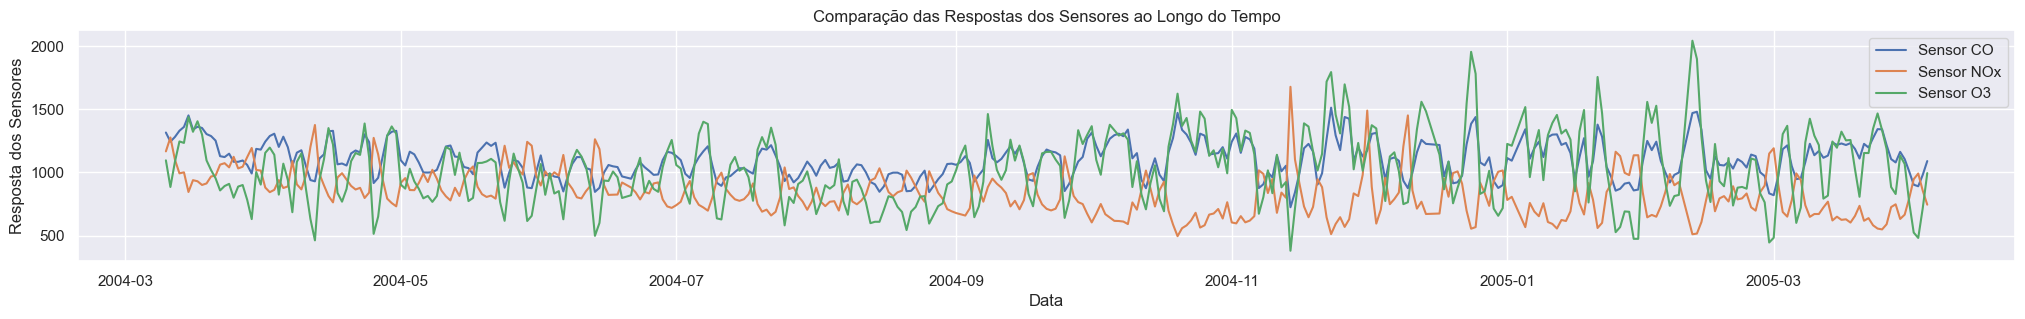

In [37]:
# Gráfico de Linhas Múltiplas para Sensores (Sensor_CO, Sensor_NOx, Sensor_O3)
plt.figure(figsize=(25, 3))
plt.plot(dados_dia['Data'], dados_dia['Sensor_CO'], label='Sensor CO')
plt.plot(dados_dia['Data'], dados_dia['Sensor_NOx'], label='Sensor NOx')
plt.plot(dados_dia['Data'], dados_dia['Sensor_O3'], label='Sensor O3')
plt.xlabel('Data')
plt.ylabel('Resposta dos Sensores')
plt.title('Comparação das Respostas dos Sensores ao Longo do Tempo')
plt.legend()
plt.show()

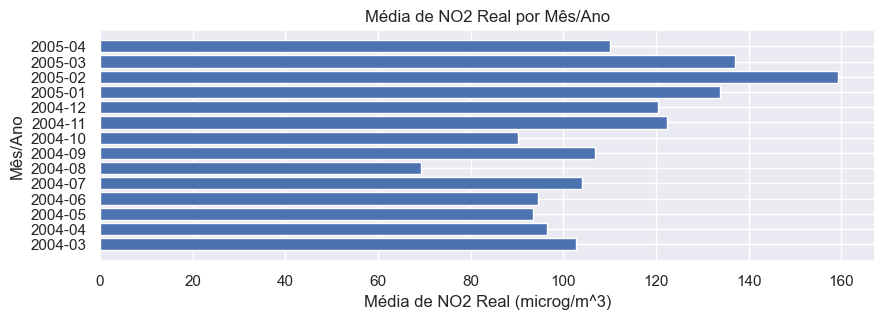

In [38]:
# Gráfico de Barras Horizontais para a Média de NO2 Real por Mês/Ano
plt.figure(figsize=(10, 3))
avg_no2_per_month = dados_dia.groupby('Mes_Ano')['NO2_Real'].mean()
plt.barh(avg_no2_per_month.index.astype(str), avg_no2_per_month)
plt.xlabel('Média de NO2 Real (microg/m^3)')
plt.ylabel('Mês/Ano')
plt.title('Média de NO2 Real por Mês/Ano')
plt.show()

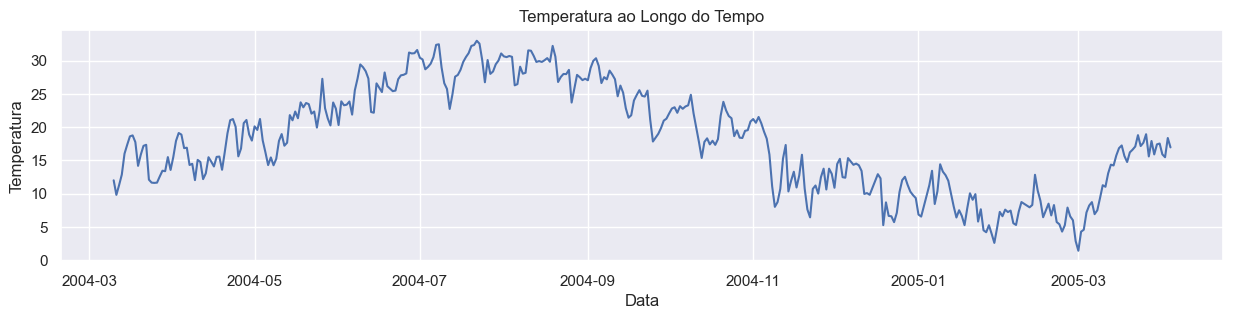

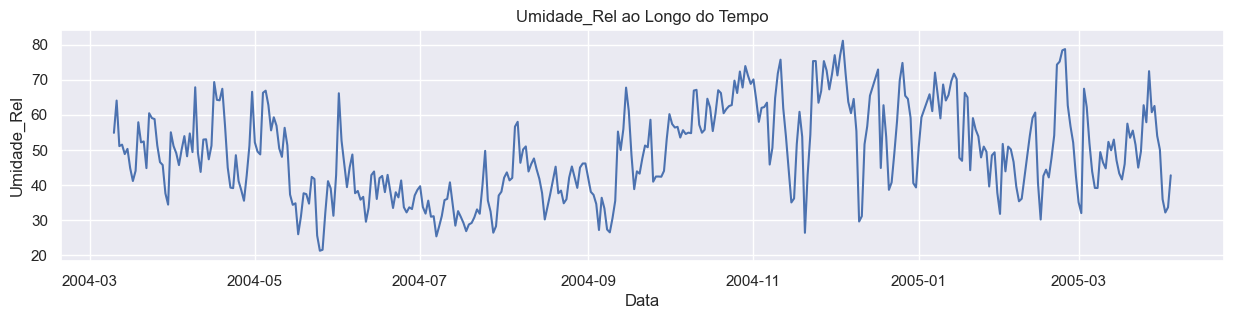

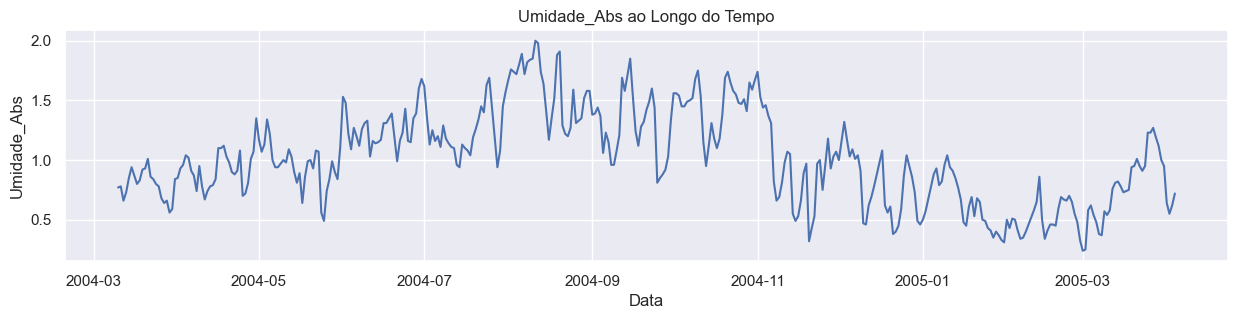

In [39]:
# Configurar o estilo do gráfico
sns.set(style="darkgrid")

# Escolha as variáveis que você deseja analisar
variaveis_analise = ['Temperatura', 'Umidade_Rel', 'Umidade_Abs']

# Criar gráficos de linha para cada variável
for variavel in variaveis_analise:
    plt.figure(figsize=(15, 3))
    sns.lineplot(x='Data', y=variavel, data=dados_dia)
    plt.title(f'{variavel} ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel(variavel)
    plt.show()

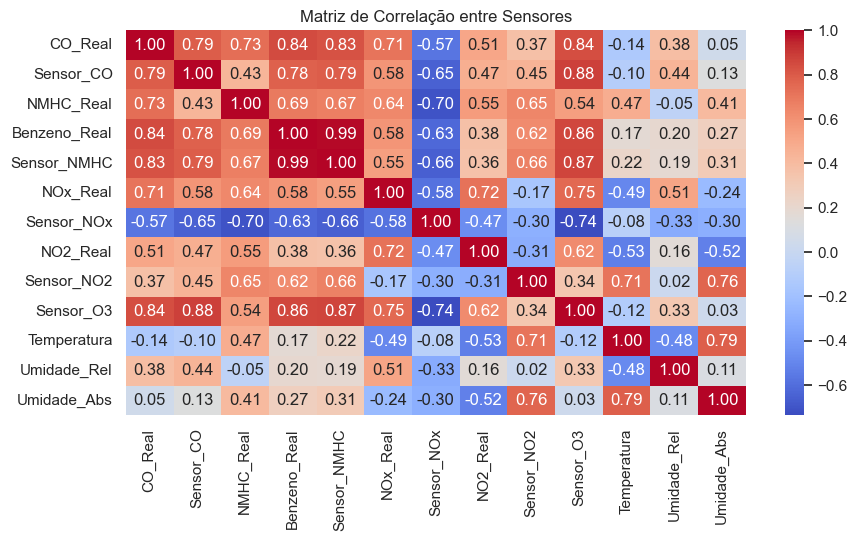

In [40]:
# Calculando a matriz de correlação
matriz_correlacao = dados_dia.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 5))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação entre Sensores')
plt.show()

In [41]:
# Criando uma máscara para identificar os valores de correlação acima de 0.7 (excluindo a diagonal principal que é sempre 1)
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool), k=1)
correlacoes_altas = matriz_correlacao.where(mask) > 0.7

# Encontrando os pares com correlação acima de 0.7
pares_correlacao_alta = [(i, j) for i in correlacoes_altas.columns for j in correlacoes_altas.index if correlacoes_altas.loc[j, i]]

pares_correlacao_alta

[('Sensor_CO', 'CO_Real'),
 ('NMHC_Real', 'CO_Real'),
 ('Benzeno_Real', 'CO_Real'),
 ('Benzeno_Real', 'Sensor_CO'),
 ('Sensor_NMHC', 'CO_Real'),
 ('Sensor_NMHC', 'Sensor_CO'),
 ('Sensor_NMHC', 'Benzeno_Real'),
 ('NOx_Real', 'CO_Real'),
 ('NO2_Real', 'NOx_Real'),
 ('Sensor_O3', 'CO_Real'),
 ('Sensor_O3', 'Sensor_CO'),
 ('Sensor_O3', 'Benzeno_Real'),
 ('Sensor_O3', 'Sensor_NMHC'),
 ('Sensor_O3', 'NOx_Real'),
 ('Temperatura', 'Sensor_NO2'),
 ('Umidade_Abs', 'Sensor_NO2'),
 ('Umidade_Abs', 'Temperatura')]

##### b. Estime o comportamento da Umidade Relativa com base na sua resposta a outros parâmetros.
A umidade relativa do ar: relação entre quantidade de água que existe no ar (umidade absoluta) e quantidade máxima de água que poderia existir na mesma temperatura (ponto de saturação)

In [44]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [43]:
# Supondo que 'dados_dia' é o DataFrame contendo os seus dados.
# Certifique-se de que a coluna 'Data' está em formato de data e que está ordenada.
dados_dia['Data'] = pd.to_datetime(dados_dia['Data'])
dados_dia = dados_dia.set_index('Data')
dados_dia = dados_dia.sort_index()

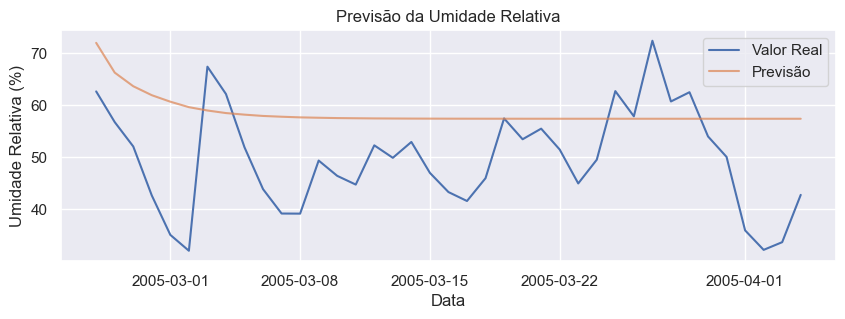

In [27]:
# Escolhendo a umidade relativa como a variável alvo.
y = dados_dia['Umidade_Rel']

# Dividindo os dados em treino e teste.
# Para este exemplo, estou usando os últimos dados disponíveis como teste.
train, test = y[1:int(len(y)*0.9)], y[int(len(y)*0.9):]

# Ajuste do modelo ARIMA.
# Os parâmetros p, d e q devem ser determinados através de métodos como AIC, BIC ou análise de autocorrelação.
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

# Predição
predictions = model_fit.forecast(steps=len(test))

# Plotando os valores reais contra as previsões.
plt.figure(figsize=(10,3))
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Previsão', alpha=0.7)
plt.xlabel('Data')
plt.ylabel('Umidade Relativa (%)')
plt.title('Previsão da Umidade Relativa')
plt.legend()
plt.show()


SARIMA - Seasonal Autoregressive Integrated Moving Average

O Erro Quadrático Médio do nosso modelo é 9.92920332069957


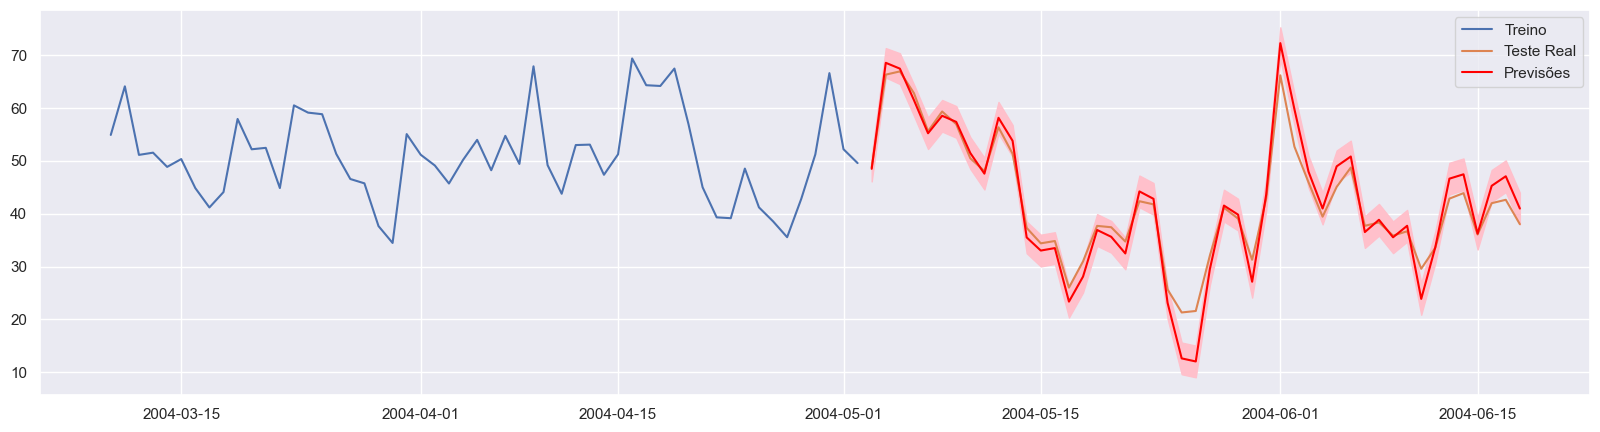

In [45]:
# Dividir os dados em treino e teste
tscv = TimeSeriesSplit(n_splits=7)
train_index, test_index = next(tscv.split(dados_dia))
train, test = dados_dia.iloc[train_index], dados_dia.iloc[test_index]


model = SARIMAX(train['Umidade_Rel'],
                exog=train[['Temperatura', 'Umidade_Abs']],
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0), # não há sazonalidade no modelo
                enforce_stationarity=False, # não aplicar as restrições teóricas
                enforce_invertibility=False) # não aplicar as restrições teóricas

# Parâmetros do modelo (order=(1, 1, 1)) com base em análises anteriores, indicando um componente autoregressivo de ordem 1, um termo de diferenciação de ordem 1 para tornar a série estacionária e um componente de média móvel de ordem 1.

# Treinar o modelo
results = model.fit()

# Fazer previsões
predictions = results.get_forecast(steps=len(test), exog=test[['Temperatura', 'Umidade_Abs']])
predicted_mean = predictions.predicted_mean
predicted_conf_int = predictions.conf_int()

# Calcular o erro quadrático médio
mse = mean_squared_error(test['Umidade_Rel'], predicted_mean)
print(f'O Erro Quadrático Médio do nosso modelo é {mse}')

# Vamos plotar os resultados para visualizar o ajuste do modelo
plt.figure(figsize=(20, 5))
plt.plot(train['Umidade_Rel'], label='Treino')
plt.plot(test['Umidade_Rel'], label='Teste Real')
plt.plot(predicted_mean, label='Previsões', color='red')
plt.fill_between(predicted_conf_int.index,
                 predicted_conf_int.iloc[:, 0],
                 predicted_conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.show()